🚀 Iniciando motor de extracción de datos financieros...
YF.download() has changed argument auto_adjust default to True
✅ Datos descargados exitosamente. Primeras filas:
Ticker      Dolar_Blue_Aprox      Bitcoin          Oro       S&P500  \
Date                                                                  
2020-01-01         59.826630  7200.174316          NaN          NaN   
2020-01-02         59.858627  6985.470215  1524.500000  3257.850098   
2020-01-03         59.798901  7344.884277  1549.199951  3234.850098   
2020-01-04         59.798901  7410.656738  1549.199951  3234.850098   
2020-01-05         59.798901  7411.317383  1549.199951  3234.850098   

Ticker      Merval_ARG  
Date                    
2020-01-01         NaN  
2020-01-02     41107.0  
2020-01-03     40499.0  
2020-01-04     40499.0  
2020-01-05     40499.0  
💾 Archivo 'Monitor_Mercados_Reales.xlsx' guardado con datos REALES.


<Figure size 1200x600 with 0 Axes>

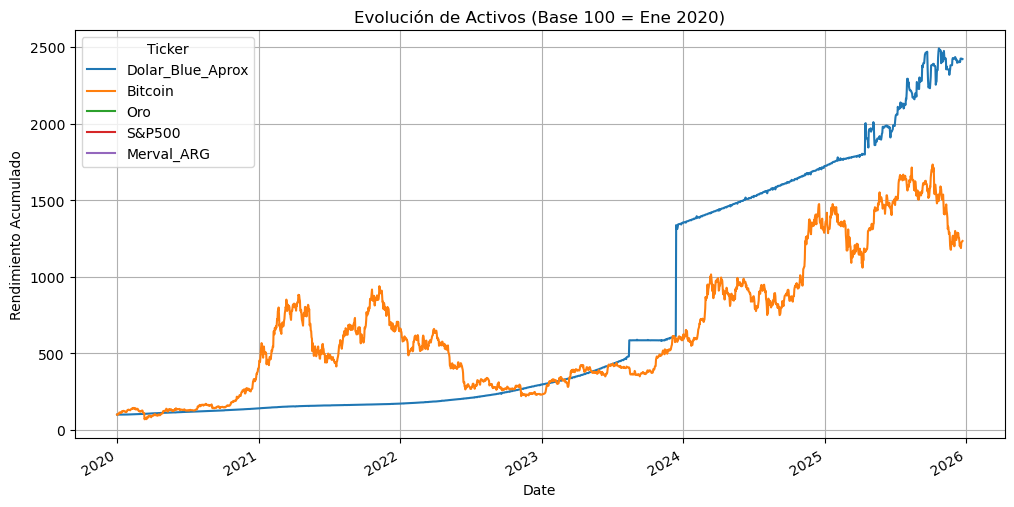

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("🚀 Iniciando motor de extracción de datos financieros...")

# 1. DEFINIR LOS ACTIVOS (Tickers)
# Puedes buscar estos códigos en finance.yahoo.com
tickers = {
    'S&P500': '^GSPC',       # El mercado de EE.UU.
    'Merval_ARG': '^MERV',   # Bolsa Argentina
    'Bitcoin': 'BTC-USD',    # Crypto
    'Oro': 'GC=F',           # Commodities
    'Dolar_Blue_Aprox': 'ARS=X' # Tipo de cambio oficial (Blue no está oficial en Yahoo, usamos oficial como proxy o CCL via Bonos)
}

# 2. DESCARGAR DATOS (La magia)
# Bajamos datos desde el 2020 hasta hoy para ver el impacto post-pandemia
datos_crudos = yf.download(list(tickers.values()), start="2020-01-01", progress=False)['Close']

# 3. LIMPIEZA Y RENOMBRE
# Las columnas vienen con los códigos raros (^GSPC), vamos a ponerle nombres bonitos
# Invertimos el diccionario para mapear
mapa_nombres = {v: k for k, v in tickers.items()}
datos_crudos.rename(columns=mapa_nombres, inplace=True)

# Rellenar fines de semana o feriados con el dato anterior (ffill)
df_mercado = datos_crudos.ffill()

print("✅ Datos descargados exitosamente. Primeras filas:")
print(df_mercado.head())

# 4. CALCULO DE RENDIMIENTOS (Lo que le importa al economista)
# No miramos precios absolutos, miramos retornos logarítmicos o porcentuales
df_retornos = df_mercado.pct_change().dropna()

# 5. GENERAR EXCEL REAL
nombre_archivo = 'Monitor_Mercados_Reales.xlsx'
df_mercado.to_excel(nombre_archivo, sheet_name='Precios')

# Tip de Pro: Guardamos también la matriz de correlación en otra hoja
with pd.ExcelWriter(nombre_archivo, mode='a', engine='openpyxl') as writer:
    df_retornos.corr().to_excel(writer, sheet_name='Correlaciones')

print(f"💾 Archivo '{nombre_archivo}' guardado con datos REALES.")

# 6. VISUALIZACIÓN RÁPIDA (Solo para verificar en Python)
plt.figure(figsize=(12, 6))
# Normalizamos a base 100 para comparar peras con manzanas
(df_mercado / df_mercado.iloc[0] * 100).plot(figsize=(12,6))
plt.title('Evolución de Activos (Base 100 = Ene 2020)')
plt.ylabel('Rendimiento Acumulado')
plt.grid(True)
plt.show()